In [2]:
import eleanor

2024-06-13 12:02:54.187073: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 12:02:54.189866: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 12:02:54.228186: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 12:02:55.043428: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
star = eleanor.Source(name='FI Boo')

Most recent sector available =  76
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 51...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1319k      0  0:00:01  0:00:01 --:--:-- 1319k


Calculating Cadences...
Assuring Quality Flags...
Making CBVs...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4005k  100 4005k    0     0  1386k      0  0:00:02  0:00:02 --:--:-- 1386k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3937k  100 3937k    0     0  2081k      0  0:00:01  0:00:01 --:--:-- 2080k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4005k  100 4005k    0     0  2027k      0  0:00:01  0:00:01 --:--:-- 2026k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3937k  100 3937k    0     0  2543k      0  0:00:01  0:00:01 --:--:-- 2541k
  % Total    % Received % Xferd  Average Speed   Tim

Success! Sector 51 now available.


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


In [6]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True)

In [8]:
q = data.quality == 0

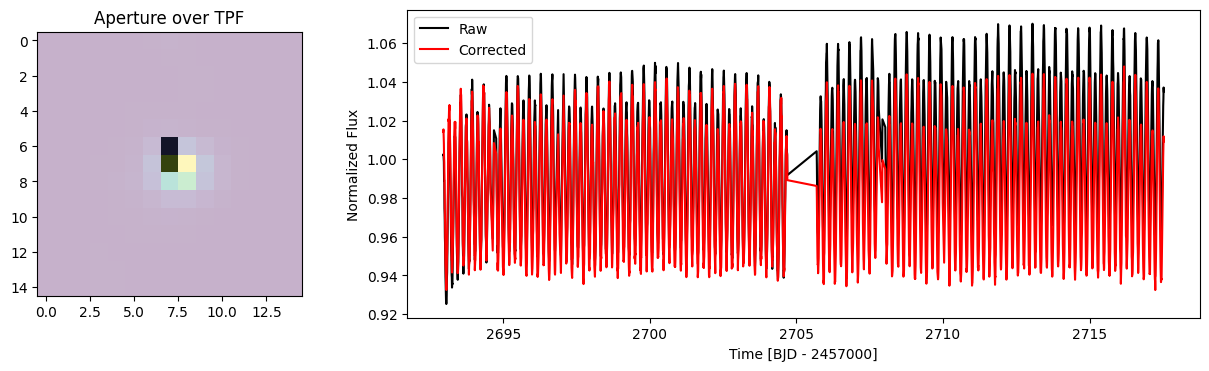

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.all_apertures[0], cmap='Greys', alpha=0.7)
ax1.set_title('Aperture over TPF')

ax2.plot(data.time[q], data.all_raw_flux[0][q]/np.nanmedian(data.all_raw_flux[0][q]), 'k', label='Raw')
ax2.plot(data.time[q], data.all_corr_flux[0][q]/np.nanmedian(data.all_corr_flux[0][q]) - 0.015, 'r', label='Corrected')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux')
ax2.legend();


In [10]:
data.time[q]

array([2692.95723459, 2692.96417896, 2692.97112334, ..., 2717.51928938,
       2717.52623364, 2717.53317791])

In [11]:
data.all_corr_flux[0][q]

array([9830.34743231, 9841.54042062, 9813.76357365, ..., 9749.34947253,
       9807.69902886, 9782.19563677])

In [24]:
data.time[q].tofile('/home/pribulla/Downloads/time.csv',sep=',',format='%12.5f')

In [33]:
np.savetxt('/home/pribulla/Downloads/time.csv', np.transpose([data.time[q], data.all_corr_flux[0][q]]), fmt='%12.5f', delimiter=" ")